In [1]:
# importing any and all libraries I'll need
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/luisortega/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# PLEASE DOWNLOAD THE ATTACHED CSV FILES IN ORDER FOR THE BELOW TO WORK

In [3]:
# importing rolling stones top 500 songs
RST500Songs = pd.read_csv("Top500Songs.csv", encoding = 'Latin 1')

In [4]:
RST500Songs.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [5]:
# some exploratory data analysis here
RST500Songs.title.isnull()
# great, no null values for song titles

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: title, Length: 500, dtype: bool

In [6]:
RST500Songs.released.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: released, Length: 500, dtype: bool

In [7]:
# let's check this for all the columns
RST500Songs.isnull().sum()

title            0
description      0
appears on       0
artist           0
writers          0
producer         0
released         0
streak           6
position       107
dtype: int64

In [8]:
# we notice here that the streak and position columns have null values; we'll want to get rid of that. 
# The simple pandas function .dropna(, inplace = True) does the trick. I'm setting inplace to true because I don't 
# want it to return another dataframe, but just fix the original one that I have.
RST500Songs.dropna(inplace=True)

In [9]:
RST500Songs.isnull().sum()
# As we can see, no missing values now. 

title          0
description    0
appears on     0
artist         0
writers        0
producer       0
released       0
streak         0
position       0
dtype: int64

In [10]:
# continuing eda
RST500Songs.shape

(393, 9)

In [11]:
RST500Songs.describe()

,title,description,appears on,artist,writers,producer,released,streak,position
count,393,393,393,393,393,393,393,393,393
unique,352,356,314,211,280,240,273,38,100
top,Crazy,"""The Message"" was a breakthrough in hip-hop, t...",The Ultimate Collection (Motown),The Beatles,"John Lennon, Paul McCartney",George Martin,"Oct. , 1969",15 weeks,No. 1
freq,4,2,10,20,17,18,5,35,76


In [12]:
RST500Songs.head(2)

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1


In [13]:
# we see that the released year is an entire date. This will not work well with visualization. We'll need to turn
# that date into a numeric number so that we can then use it to plot. The same goes with streak; it's text, and it 
# needs to be numeric for it to be visualized.

In [14]:
# let's just make it easy and create a new column that houses the dates in int form.
# We can turn the date column into a string, and since there's a comma in there, we can split on the comma and then
# just index the year and put that into the year released column
RST500Songs['release_year_int'] = RST500Songs['released'].str.split(", ").str[1]

# THIS IDEA CAME FROM ANOTHER CS FRIEND OF MINE, BUT THE CODE IS NOT THEIRS. I WAS COMPLAINING OUT LOUD ABOUT THIS
# AND ASKED FOR HIS OPNION ON THE MATTET, AND THAT'S WHEN THEY SUGGESTED TURNING THE COLUMN INTO A STRING AND SEEING
# WHAT MANIPULATIONS I COULD MUSTER FROM THERE.
# 

In [15]:
RST500Songs['released'].str.split(", ").str[1]

0      1965
1      1965
2      1971
3      1971
4      1967
       ... 
493    1960
494    1967
496    1964
498    1991
499    1965
Name: released, Length: 393, dtype: object

In [16]:
# kind of got lucky here. What I was trying to do was check to see the data type of the year. I eneded up getting 
# an error, and in the error realized that the datatype is a string, and not an integer. 
# RST500Songs['release_year_int'][1].type()

In [17]:
# a quick google searc says that astype() is the easiest way to change all the values in a dataframe column into
# numeric values, which is what I would want to do. 
RST500Songs['release_year_int'] = RST500Songs['release_year_int'].astype(int)

In [18]:
 RST500Songs.head()

,title,description,appears on,artist,writers,producer,released,streak,position,release_year_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2,1965
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1,1965
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3,1971
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2,1971
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1,1967


In [19]:
# now that we have that column ready to go, we can deleted the original released column
RST500Songs.drop('released', axis = 1, inplace = True)

In [20]:
RST500Songs

,title,description,appears on,artist,writers,producer,streak,position,release_year_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,12 weeks,No. 2,1965
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,14 weeks,No. 1,1965
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono",9 weeks,No. 3,1971
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,13 weeks,No. 2,1971
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,12 weeks,No. 1,1967
...,...,...,...,...,...,...,...,...,...
493,The Twist,"""The Twist"" began as a B side for Ballard and ...",Greatest Hits (Prime Cuts),Chubby Checker,Hank Ballard,Karl Mann,39 weeks,No. 1,1960
494,Penny Lane,"After Lennon composed ""Strawberry Fields Forev...",Magical Mystery Tour (Capitol/Apple),The Beatles,"John Lennon, Paul McCartney",George Martin,10 weeks,No. 1,1967
496,Leader of the Pack,Morton found the inspiration for this song at ...,Myrmidons of Melodrama: Definitive Collection ...,The Shangri-Las,"George ""Shadow"" Morton, Jeff Barry, Ellie Gree...","Morton, Barry, Greenwich",12 weeks,No. 1,1964
498,Come As You Are,"""It's just about people and what they're expec...",Nevermind (Geffen),Nirvana,"Kurt Cobain, Nirvana","Butch Vig, Nirvana",18 weeks,No. 32,1991


In [21]:
# now we need to do the same thing that we did with the above with the streaks column, as those are also text values
# that we need to change to numeric values. 
RST500Songs['streaks_int'] = RST500Songs['streak'].str.split().str[0]
RST500Songs['streaks_int'] = pd.to_numeric(RST500Songs['streaks_int'], errors = 'coerce')

In [22]:
# since some of the songs may not have a postion allocated to them, we will need to make sure that after completing
# this we will not have any missing values, whichwe do
RST500Songs.isnull().sum()

title               0
description         0
appears on          0
artist              0
writers             0
producer            0
streak              0
position            0
release_year_int    0
streaks_int         7
dtype: int64

In [23]:
RST500Songs.dropna(inplace=True)

In [24]:
RST500Songs.isnull().sum()

title               0
description         0
appears on          0
artist              0
writers             0
producer            0
streak              0
position            0
release_year_int    0
streaks_int         0
dtype: int64

In [25]:
# lets turn our float64 into int64
RST500Songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             386 non-null    object 
 1   description       386 non-null    object 
 2   appears on        386 non-null    object 
 3   artist            386 non-null    object 
 4   writers           386 non-null    object 
 5   producer          386 non-null    object 
 6   streak            386 non-null    object 
 7   position          386 non-null    object 
 8   release_year_int  386 non-null    int64  
 9   streaks_int       386 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 33.2+ KB


In [26]:
RST500Songs['streaks_int'] = RST500Songs['streaks_int'].astype(int)

In [27]:
RST500Songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             386 non-null    object
 1   description       386 non-null    object
 2   appears on        386 non-null    object
 3   artist            386 non-null    object
 4   writers           386 non-null    object
 5   producer          386 non-null    object
 6   streak            386 non-null    object
 7   position          386 non-null    object
 8   release_year_int  386 non-null    int64 
 9   streaks_int       386 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 33.2+ KB


In [28]:
RST500Songs.head()

,title,description,appears on,artist,writers,producer,streak,position,release_year_int,streaks_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,12 weeks,No. 2,1965,12
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,14 weeks,No. 1,1965,14
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono",9 weeks,No. 3,1971,9
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,13 weeks,No. 2,1971,13
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,12 weeks,No. 1,1967,12


In [29]:
RST500Songs.drop('streak', axis = 1, inplace=True)

In [30]:
RST500Songs.head()

,title,description,appears on,artist,writers,producer,position,release_year_int,streaks_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,No. 2,1965,12
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,No. 1,1965,14
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono",No. 3,1971,9
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,No. 2,1971,13
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,No. 1,1967,12


In [31]:
# We'll repeat the same process for the position column
RST500Songs['position_int'] = RST500Songs['position'].str.split(". ").str[1]
RST500Songs['position_int'] = pd.to_numeric(RST500Songs['position_int'], errors = 'coerce')

In [32]:
RST500Songs.dropna(inplace = True)

In [33]:
RST500Songs['position_int'] = RST500Songs['position_int'].astype(int)

In [34]:
# dropping the position column.
RST500Songs.drop('position', axis = 1, inplace = True)

In [35]:
RST500Songs

,title,description,appears on,artist,writers,producer,release_year_int,streaks_int,position_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,1965,12,2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,1965,14,1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono",1971,9,3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,1971,13,2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,1967,12,1
...,...,...,...,...,...,...,...,...,...
493,The Twist,"""The Twist"" began as a B side for Ballard and ...",Greatest Hits (Prime Cuts),Chubby Checker,Hank Ballard,Karl Mann,1960,39,1
494,Penny Lane,"After Lennon composed ""Strawberry Fields Forev...",Magical Mystery Tour (Capitol/Apple),The Beatles,"John Lennon, Paul McCartney",George Martin,1967,10,1
496,Leader of the Pack,Morton found the inspiration for this song at ...,Myrmidons of Melodrama: Definitive Collection ...,The Shangri-Las,"George ""Shadow"" Morton, Jeff Barry, Ellie Gree...","Morton, Barry, Greenwich",1964,12,1
498,Come As You Are,"""It's just about people and what they're expec...",Nevermind (Geffen),Nirvana,"Kurt Cobain, Nirvana","Butch Vig, Nirvana",1991,18,32


In [36]:
# lets sort the list to see what the oldest song on this list is
RST500Songs.sort_values("release_year_int", ascending = True)

,title,description,appears on,artist,writers,producer,release_year_int,streaks_int,position_int
100,Crazy,"""Crazy"" was a rarity in the 2000s: a universal...",St. Elsewhere (Downtown),Gnarls Barkley,"Brian Burton, Thomas Calloway, Gianfranco Reve...",Danger Mouse,1906,24,2
50,Crazy,"""Crazy"" was a rarity in the 2000s: a universal...",St. Elsewhere (Downtown),Gnarls Barkley,"Brian Burton, Thomas Calloway, Gianfranco Reve...",Danger Mouse,1906,24,2
156,Rehab,"Drawing on Winehouse's real-life struggles, th...",Back to Black (Universal Republic),Amy Winehouse,Winehouse,Mark Ronson,1907,20,9
198,Earth Angel,Crudely recorded in a garage and released on a...,Earth Angel (Ace),The Penguins,"Jesse Belvin, Curtis Williams",Dootsie Williams,1954,15,8
191,(Were Gonna) Rock Around the Clock,Haley began his career as a country yodeler be...,The Best of Bill Haley and His Comets (MCA),Bill Haley and His Comets,"Jimmy DeKnight, Max Freedman",Milt Gabler,1954,24,1
...,...,...,...,...,...,...,...,...,...
468,Since U Been Gone,"Pop gurus Max Martin and Lukasz ""Dr. Luke"" Got...",Breakaway (RCA),Kelly Clarkson,"Dr. Luke, Max Martin","Dr. Luke, Martin",2004,46,2
418,American Idiot,No song captured the rancid zeitgeist of the B...,American Idiot (Reprise),Green Day,Green Day,"Rob Cavallo, Green Day",2004,20,61
323,Take Me Out,"""Take Me Out"" put Franz Ferdinand at the head ...",Franz Ferdinand (Domino),Franz Ferdinand,"Alex Kapranos, Nick McCarthy",Tore Johansson,2004,19,66
214,Paper Planes,Maya Arulpragasam cheerfully threatens to stea...,Kala (Interscope),M.I.A.,"M.I.A., Diplo","Diplo, Switch",2007,21,4


In [37]:
# Cool, but we noticed now that we happend to have a duplicate. Let's go ahead and replace that
RST500Songs.drop_duplicates(inplace=True)

In [38]:
RST500Songs.sort_values("release_year_int", ascending=True)

,title,description,appears on,artist,writers,producer,release_year_int,streaks_int,position_int
50,Crazy,"""Crazy"" was a rarity in the 2000s: a universal...",St. Elsewhere (Downtown),Gnarls Barkley,"Brian Burton, Thomas Calloway, Gianfranco Reve...",Danger Mouse,1906,24,2
156,Rehab,"Drawing on Winehouse's real-life struggles, th...",Back to Black (Universal Republic),Amy Winehouse,Winehouse,Mark Ronson,1907,20,9
191,(Were Gonna) Rock Around the Clock,Haley began his career as a country yodeler be...,The Best of Bill Haley and His Comets (MCA),Bill Haley and His Comets,"Jimmy DeKnight, Max Freedman",Milt Gabler,1954,24,1
198,Earth Angel,Crudely recorded in a garage and released on a...,Earth Angel (Ace),The Penguins,"Jesse Belvin, Curtis Williams",Dootsie Williams,1954,15,8
42,Tutti-Frutti,"""I'd been singing 'Tutti-Frutti' for years,"" s...",The Georgia Peach (Specialty),Little Richard,"Dorothy La Bostrie, Richard Penniman, Joe Lubin","Robert ""Bumps"" Blackwell",1955,12,17
...,...,...,...,...,...,...,...,...,...
364,Maps,"""Maps"" is both a soul ballad and an art-punk c...",Fever to Tell (Interscope),Yeah Yeah Yeahs,Yeah Yeah Yeahs,David Andrew Sitek,2004,13,87
323,Take Me Out,"""Take Me Out"" put Franz Ferdinand at the head ...",Franz Ferdinand (Domino),Franz Ferdinand,"Alex Kapranos, Nick McCarthy",Tore Johansson,2004,19,66
468,Since U Been Gone,"Pop gurus Max Martin and Lukasz ""Dr. Luke"" Got...",Breakaway (RCA),Kelly Clarkson,"Dr. Luke, Max Martin","Dr. Luke, Martin",2004,46,2
438,Umbrella,The songwriters initially offered the track to...,Good Girl Gone Bad (Def Jam),Rihanna Featuring Jay-Z,"The-Dream, Kuk Harrell, Jay-Z, Christopher ""Tr...","Harrell, Stewart",2007,27,1


In [39]:
# Let's see which year had the most songs released. 
RST500Songs.groupby('release_year_int').agg({'title': 'count'}).sort_values('title',ascending=False)
# we can see here, that 1965 seemed to have the most song releases, with about 25. 

,title
release_year_int,
1965,26
1966,20
1964,18
1967,18
1969,14
1970,14
1968,14
1956,13
1971,13


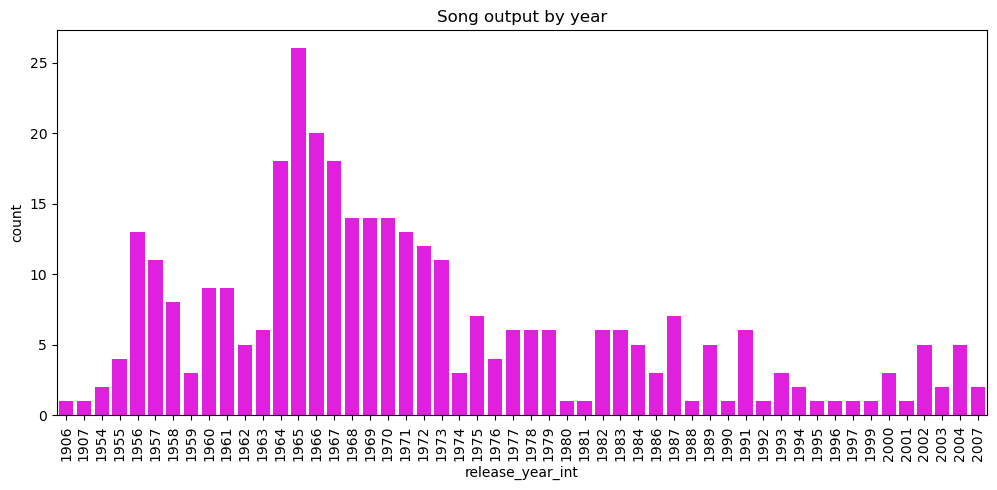

In [40]:
# since seaborn integrates with matplotlib, as long as we have both imported, we can use matplotlib methods to 
# negotiate our plot. 
plt.figure(figsize = (12,5))
plt.title("Song output by year")
plt.xticks(rotation=90)
sns.countplot(data = RST500Songs, x='release_year_int', color = 'magenta')
plt.show()

In [41]:
# Which song had the longest streak?
RST500Songs.sort_values("streaks_int", ascending = False).head()

,title,description,appears on,artist,writers,producer,release_year_int,streaks_int,position_int
468,Since U Been Gone,"Pop gurus Max Martin and Lukasz ""Dr. Luke"" Got...",Breakaway (RCA),Kelly Clarkson,"Dr. Luke, Max Martin","Dr. Luke, Martin",2004,46,2
456,Ignition (Remix),R. Kelly's automotive metaphors for booty-knoc...,Chocolate Factory (Jive),R. Kelly,Kelly,Kelly,2002,42,2
493,The Twist,"""The Twist"" began as a B side for Ballard and ...",Greatest Hits (Prime Cuts),Chubby Checker,Hank Ballard,Karl Mann,1960,39,1
461,Under the Boardwalk,A staple of beach-town jukeboxes every summer ...,The Very Best of the Drifters (Rhino),The Drifters,"Arthur Resnick, Kenny Young",Bert Berns,1964,33,4
168,Hey Ya!,Not a likely recipe for a hit: a rock song wit...,Speakerboxxx/The Love Below (LaFace/Arista),OutKast,AndrÃ© 3000,AndrÃ© 3000,2003,32,1


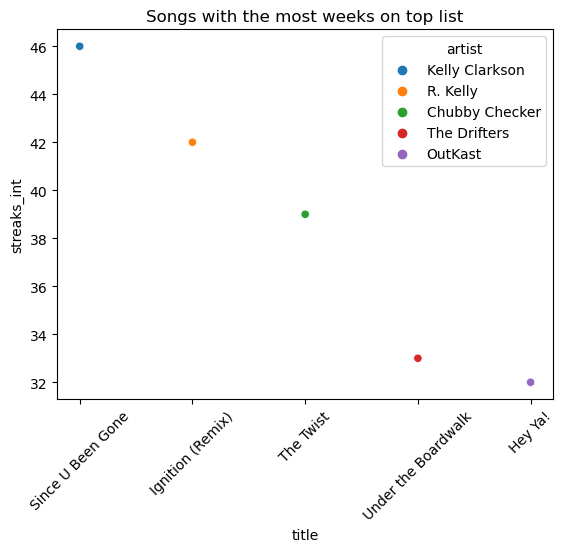

In [42]:
plt.title("Songs with the most weeks on top list")
plt.xticks(rotation=45)
sns.scatterplot(data=RST500Songs.sort_values("streaks_int", ascending = False).head(), x="title", y="streaks_int", hue='artist')
plt.show()

In [43]:
RST500Songs.head(10)

,title,description,appears on,artist,writers,producer,release_year_int,streaks_int,position_int
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,1965,12,2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,1965,14,1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono",1971,9,3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,1971,13,2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,1967,12,1
6,Johnny B. Goode,"""Johnny B. Goode"" was the first rock & roll hi...",The Anthology (Chess),Chuck Berry,Chuck Berry,Leonard and Phil Chess,1958,15,8
7,Hey Jude,The Beatles' biggest U.S. single  nine weeks ...,1 (Capitol/Apple),The Beatles,"John Lennon, Paul McCartney",George Martin,1968,19,1
8,Smells Like Teen Spirit,"Producer Butch Vig first heard ""Smells Like Te...",Nevermind (DGC),Nirvana,Kurt Cobain,Butch Vig,1991,20,6
9,What'd I Say,"""The people just went crazy, and they loved th...",The Ultimate Hits Collection (Rhino),Ray Charles,Charles,"Ahmet Ertegun, Jerry Wexler",1959,15,6
10,My Generation,"The Who's guitarist, Pete Townshend, supposedl...",My Generation (Universal),The Who,Pete Townshend,Shel Talmy,1965,5,74


In [44]:
# Let's see which artists have the most songs on this list
artistMostSongs = RST500Songs["artist"].value_counts()

In [45]:
artistMostSongs.head(10)

The Beatles                    16
The Rolling Stones              9
Elvis Presley                   8
The Beach Boys                  6
Bob Dylan                       5
U2                              5
Marvin Gaye                     4
Sly and the Family Stone        4
The Jimi Hendrix Experience     4
Ray Charles                     4
Name: artist, dtype: int64

In [46]:
# Our Top 10 is shown above. The Beatles have about twice as many songs on this list as The Rolling Stones. 
# Let's visualize this

In [47]:
artistMostSongsGraph = RST500Songs["artist"].value_counts().head(10).reset_index().rename(columns={"index":"Artist", "artist":"count"})

In [48]:
artistMostSongsGraph

,Artist,count
0,The Beatles,16
1,The Rolling Stones,9
2,Elvis Presley,8
3,The Beach Boys,6
4,Bob Dylan,5
5,U2,5
6,Marvin Gaye,4
7,Sly and the Family Stone,4
8,The Jimi Hendrix Experience,4
9,Ray Charles,4


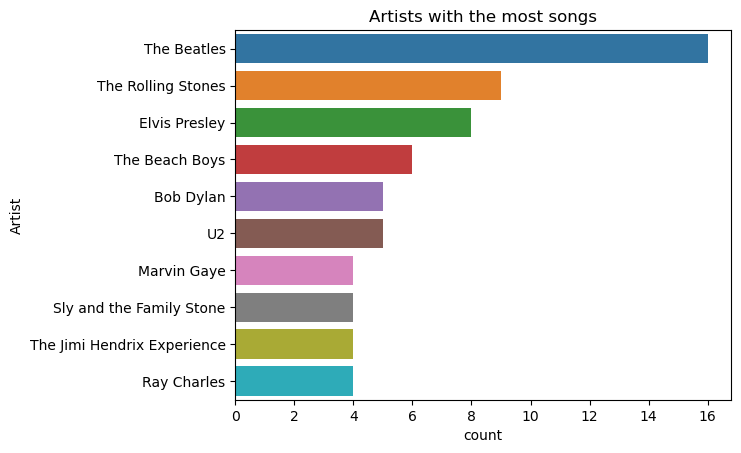

In [49]:
plt.title("Artists with the most songs")
sns.barplot(data= artistMostSongsGraph, x="count", y="Artist", orient="h")
plt.show()

In [50]:
# Let's see what time period The Beatles came out in

In [51]:
TBYear = RST500Songs[RST500Songs["artist"] == "The Beatles"]["release_year_int"].reset_index()

In [52]:
TBYear.drop("index", axis = 1, inplace=True)

In [53]:
TBYear.sort_values("release_year_int", ascending=True)

,release_year_int
2,1963
6,1963
7,1964
8,1964
10,1964
12,1965
4,1965
1,1965
14,1966
13,1967


In [54]:
# It seems that the time period is about the '60-'70's.
# Since The Beatles have a lot of songs on here, maybe we could check and see if most of the songs on this list came
# from the '60'sor '70's
# This makes sense as in line 37, there were 25 songs that came out that made the top list, and with the Beatles songs
# contributing the most to them. 

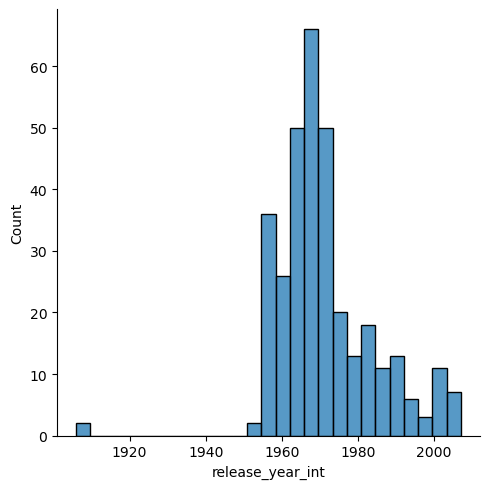

In [55]:
sns.displot(RST500Songs['release_year_int'])
plt.show()

In [56]:
# as we can see here, the majority of songs are clustered around that 1960-1970 mark.

In [57]:
# USING THE BILLBOARDS HOT 100 SONGS

In [58]:
# quick exploration of our data
billboardscsv = pd.read_csv("charts.csv")
billboardscsv.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [59]:
billboardscsv.columns

Index(['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank',
       'weeks-on-board'],
      dtype='object')

In [60]:
billboardscsv.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

In [61]:
# lastweek has a lot of missing values. Rather than replace them, we'll just delete them.
billboardscsv.dropna(inplace=True)

In [62]:
billboardscsv.isnull().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
dtype: int64

In [63]:
# checking how many rows we now have
billboardscsv.shape

(297775, 7)

In [64]:
# how can we tell which artist has spent the most weeks on the board
mostWeeks = billboardscsv[["artist", "song", "weeks-on-board"]].sort_values("weeks-on-board", ascending=False).head(10)
mostWeeks

,artist,song,weeks-on-board
919,The Weeknd,Blinding Lights,90
1020,The Weeknd,Blinding Lights,89
1117,The Weeknd,Blinding Lights,88
1215,The Weeknd,Blinding Lights,87
39148,Imagine Dragons,Radioactive,87
39247,Imagine Dragons,Radioactive,86
1316,The Weeknd,Blinding Lights,86
39341,Imagine Dragons,Radioactive,85
1416,The Weeknd,Blinding Lights,85
1516,The Weeknd,Blinding Lights,84


In [65]:
# It looks like The Weekend and Imagine Dragons are the two artists that have spent the most week on the billboard. 

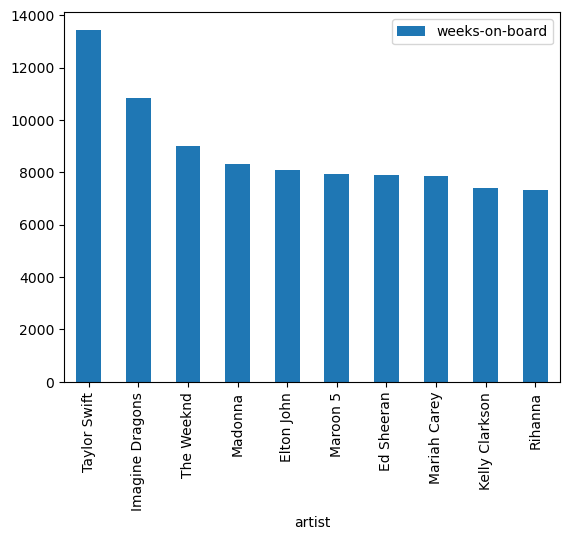

In [66]:
# lets look at the top ten artists that have been on th billboard and graph them.
mostWeeksdata = billboardscsv[["artist", "song", "weeks-on-board"]].sort_values("weeks-on-board",ascending= False)
mostWeeksdata.groupby("artist").agg({"weeks-on-board":"sum"}).sort_values("weeks-on-board",ascending=False).head(10).plot(kind="bar")
plt.show()

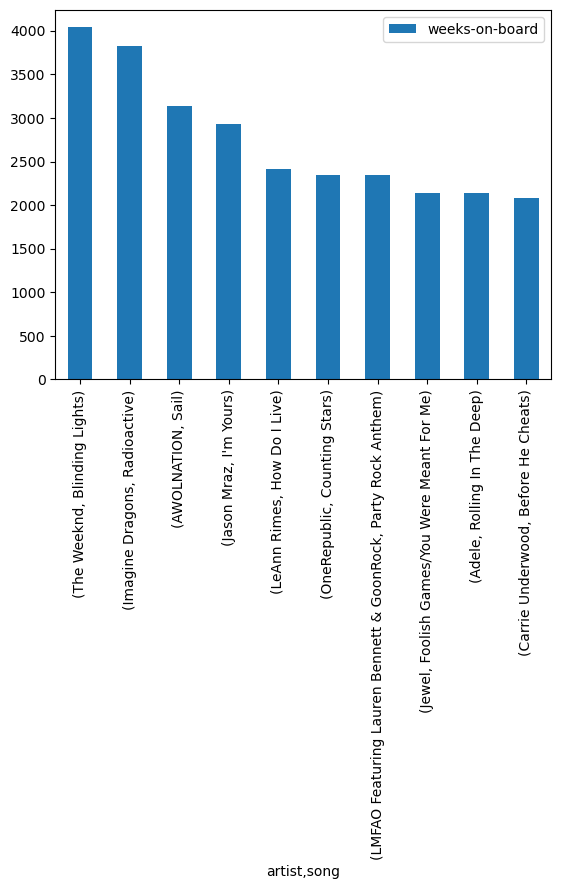

In [67]:
# this is now artist and with their respective song.
mostWeeksdata.groupby(["artist", "song"]).agg({"weeks-on-board":"sum"}).sort_values("weeks-on-board",ascending=False).head(10).plot(kind="bar")
plt.show()

In [68]:
# as we expected, The Weekend and Imagine Dragons have been on the top list the longest. 

In [69]:
# let's get the counts of how many appereances the top 15 artists have had on this list. 

In [70]:
topartist = billboardscsv["artist"].value_counts().head(15).reset_index().rename(columns = {"index":"artist", "artist":"num appereances"})
topartist    

,artist,num appereances
0,Taylor Swift,873
1,Elton John,830
2,Madonna,804
3,Kenny Chesney,719
4,Tim McGraw,680
5,Drake,667
6,Keith Urban,624
7,Rod Stewart,610
8,Stevie Wonder,605
9,Mariah Carey,579


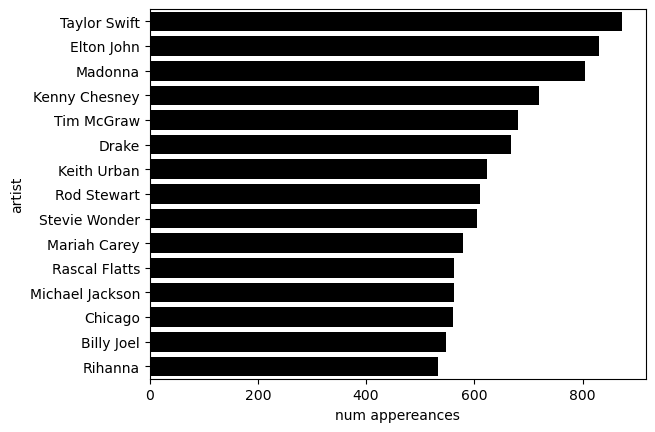

In [71]:
sns.barplot (data = topartist, x = "num appereances", y="artist", orient = "h", color = "black")
plt.show()

In [72]:
taylorSwiftBillboard = billboardscsv[billboardscsv["artist"] == "Taylor Swift"]
taylorSwiftBillboard

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
2660,2021-05-08,61,Willow,Taylor Swift,60.0,1,20
2759,2021-05-01,60,Willow,Taylor Swift,62.0,1,19
2789,2021-05-01,90,Mr. Perfectly Fine (Taylor's Version) (From Th...,Taylor Swift,30.0,30,3
2829,2021-04-24,30,Mr. Perfectly Fine (Taylor's Version) (From Th...,Taylor Swift,90.0,30,2
2861,2021-04-24,62,Willow,Taylor Swift,60.0,1,18
...,...,...,...,...,...,...,...
78464,2006-10-28,65,Tim McGraw,Taylor Swift,68.0,65,6
78567,2006-10-21,68,Tim McGraw,Taylor Swift,72.0,68,5
78671,2006-10-14,72,Tim McGraw,Taylor Swift,77.0,72,4
78776,2006-10-07,77,Tim McGraw,Taylor Swift,87.0,77,3


In [73]:
# let's see how here song's peaked rank have changed
taylorSongPeakRank = taylorSwiftBillboard.groupby("song").agg({"peak-rank":np.mean}).sort_values("peak-rank", ascending=True).reset_index()
taylorSongPeakRank

,song,peak-rank
0,Cardigan,1.000000
1,Look What You Made Me Do,1.000000
2,Willow,1.000000
3,Shake It Off,1.000000
4,We Are Never Ever Getting Back Together,1.000000
...,...,...
59,Should've Said No,43.368421
60,Welcome To New York,48.000000
61,Tim McGraw,52.947368
62,New Romantics,57.500000


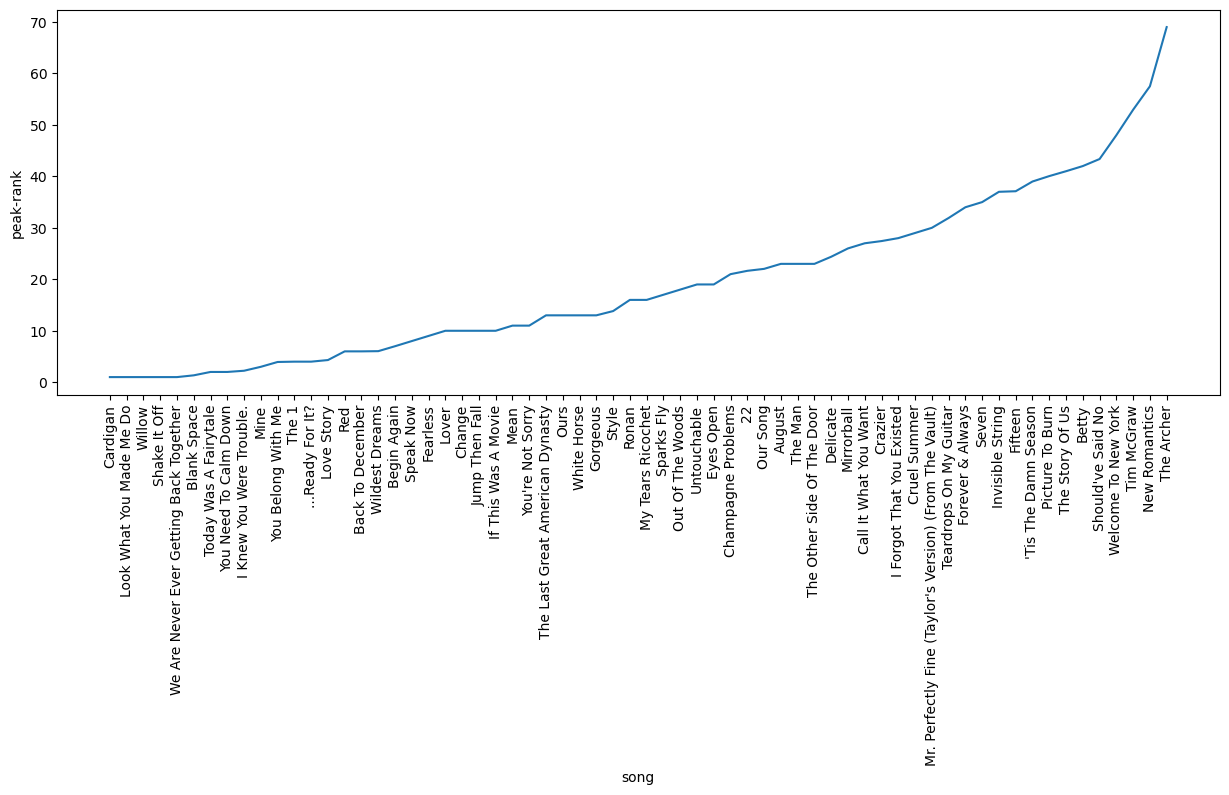

In [74]:
plt.figure(figsize = (15,5))
sns.lineplot(data = taylorSongPeakRank, x = "song", y = "peak-rank", markers=True)
plt.xticks(rotation=90)
plt.show()

In [75]:
# This section should focus on Taylor Swift data and compare her popularity to The Beatles and The Rolling Stones
# in some way. 

In [76]:
TaylorSwiftData = pd.read_csv("taylor_swift_spotify.csv")

In [77]:
TaylorSwiftData.drop("Unnamed: 0", axis=1, inplace=True)

In [78]:
TaylorSwiftData.sort_values("popularity", ascending = False)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
277,Cruel Summer,Lover,2019-08-23,2,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.11700,0.552,0.702,0.000021,0.1050,-5.707,0.1570,169.994,0.5640,99,178426
42,Is It Over Now? (Taylor's Version) (From The V...,1989 (Taylor's Version),2023-10-26,21,1Iq8oo9XkmmvCQiGOfORiz,spotify:track:1Iq8oo9XkmmvCQiGOfORiz,0.05040,0.596,0.658,0.000000,0.1270,-7.346,0.0360,100.012,0.1760,94,229477
278,Lover,Lover,2019-08-23,3,1dGr1c8CrMLDpV6mPbImSI,spotify:track:1dGr1c8CrMLDpV6mPbImSI,0.49200,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.4530,92,221306
110,Anti-Hero,Midnights,2022-10-21,3,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,0.13000,0.637,0.643,0.000002,0.1420,-6.571,0.0519,97.008,0.5330,92,200690
40,Now That We Don't Talk (Taylor's Version) (Fro...,1989 (Taylor's Version),2023-10-26,19,5KD6AEm19QnMbfWpfoOHMl,spotify:track:5KD6AEm19QnMbfWpfoOHMl,0.18600,0.793,0.512,0.000038,0.0889,-9.319,0.0338,109.994,0.0662,91,146436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Forever & Always,reputation Stadium Tour Surprise Song Playlist,2017-11-09,39,0QCS4NpURHvWdF1icdkfBw,spotify:track:0QCS4NpURHvWdF1icdkfBw,0.08060,0.607,0.829,0.000000,0.2070,-5.020,0.0588,128.057,0.5200,33,226293
339,The Lucky One,reputation Stadium Tour Surprise Song Playlist,2017-11-09,31,24ksPWXKg1k7OOG57pufED,spotify:track:24ksPWXKg1k7OOG57pufED,0.03520,0.706,0.505,0.000000,0.1300,-7.639,0.0358,117.935,0.5610,33,240266
333,Change,reputation Stadium Tour Surprise Song Playlist,2017-11-09,25,5PSOWHll3h3Vy226xSJk0M,spotify:track:5PSOWHll3h3Vy226xSJk0M,0.00418,0.543,0.763,0.000000,0.1110,-4.206,0.0376,96.006,0.2340,33,281053
348,Hey Stephen,reputation Stadium Tour Surprise Song Playlist,2017-11-09,40,0TYJbIHBtmWy9ugtU9BcbE,spotify:track:0TYJbIHBtmWy9ugtU9BcbE,0.19100,0.843,0.541,0.000002,0.1080,-7.361,0.0318,116.001,0.8380,32,256040


In [79]:
# let's try and chart her popularity over time

In [80]:
popularityTaylorGraph = TaylorSwiftData[['release_date', "popularity", "name"]].sort_values("release_date", ascending=True)

In [81]:
popularityTaylorGraph

,release_date,popularity,name
529,2006-10-24,57,Teardrops on My Guitar - Pop Version
515,2006-10-24,67,Tim McGraw
516,2006-10-24,71,Picture To Burn
517,2006-10-24,68,Teardrops On My Guitar - Radio Single Remix
518,2006-10-24,60,A Place in this World
...,...,...,...
19,2023-10-27,80,Suburban Legends (Taylor's Version) (From The ...
20,2023-10-27,85,Is It Over Now? (Taylor's Version) (From The V...
21,2023-10-27,83,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...
11,2023-10-27,77,I Know Places (Taylor's Version)


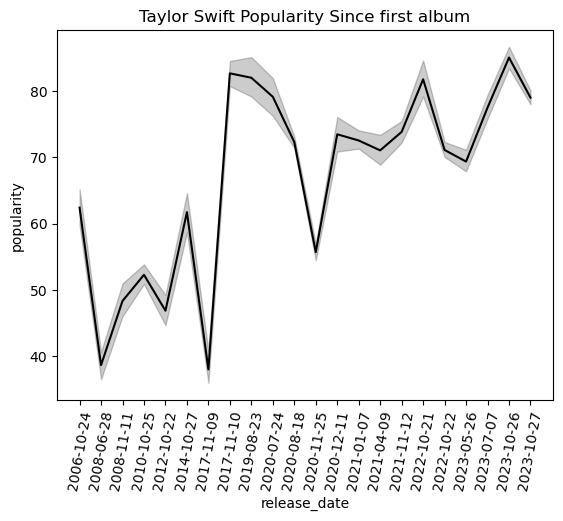

In [82]:
plt.title("Taylor Swift Popularity Since first album")
plt.xticks(rotation=80)
sns.lineplot(data = popularityTaylorGraph, x="release_date", y="popularity", color = "black")
plt.show()

In [83]:
# Taylor Swifts popularity over time has increased, with a sharp change in 2017

In [84]:
# Which one of taylor swifts albums, with their limited songs, was the longest?
TaylorSwiftDurationConversion = TaylorSwiftData.groupby("album").agg({"duration_ms":"sum"}).round(2)
TaylorSwiftDurationConversion

,duration_ms
album,
1989,2927864
1989 (Deluxe Edition),4125648
1989 (Taylor's Version),4678327
1989 (Taylor's Version) [Deluxe],4878100
Fearless,3212874
Fearless (Taylor's Version),6392490
Fearless Platinum Edition,4766621
Live From Clear Channel Stripped 2008,1675755
Lover,3711381


In [85]:
# milliseconds is a non-standard way of telling time. Let's conver it to seconds and then to hours
# creating a columns for seconds
TaylorSwiftDurationConversion["Duration_secs"] = round(TaylorSwiftDurationConversion["duration_ms"] / 1000, 1)

In [86]:
TaylorSwiftDurationConversion

,duration_ms,Duration_secs
album,,
1989,2927864,2927.9
1989 (Deluxe Edition),4125648,4125.6
1989 (Taylor's Version),4678327,4678.3
1989 (Taylor's Version) [Deluxe],4878100,4878.1
Fearless,3212874,3212.9
Fearless (Taylor's Version),6392490,6392.5
Fearless Platinum Edition,4766621,4766.6
Live From Clear Channel Stripped 2008,1675755,1675.8
Lover,3711381,3711.4


In [87]:
# Now we'll convert the seconds to hours. 
TaylorSwiftDurationConversion["Duration_hrs"] = round(TaylorSwiftDurationConversion["Duration_secs"] / 3600, 1)

In [88]:
TaylorSwiftDurationConversion

,duration_ms,Duration_secs,Duration_hrs
album,,,
1989,2927864,2927.9,0.8
1989 (Deluxe Edition),4125648,4125.6,1.1
1989 (Taylor's Version),4678327,4678.3,1.3
1989 (Taylor's Version) [Deluxe],4878100,4878.1,1.4
Fearless,3212874,3212.9,0.9
Fearless (Taylor's Version),6392490,6392.5,1.8
Fearless Platinum Edition,4766621,4766.6,1.3
Live From Clear Channel Stripped 2008,1675755,1675.8,0.5
Lover,3711381,3711.4,1.0


In [89]:
# let's delete the two columns that are non-standard
TaylorSwiftDurationConversion.drop(["duration_ms", "Duration_secs"], axis=1, inplace = True)

In [90]:
TaylorSwiftDurationConversion

,Duration_hrs
album,
1989,0.8
1989 (Deluxe Edition),1.1
1989 (Taylor's Version),1.3
1989 (Taylor's Version) [Deluxe],1.4
Fearless,0.9
Fearless (Taylor's Version),1.8
Fearless Platinum Edition,1.3
Live From Clear Channel Stripped 2008,0.5
Lover,1.0


In [91]:
# I want to see how many songs are in each album
TaylorSwiftData.groupby("album").agg({"name":"count"}).sort_values("name", ascending = False)

,name
album,
reputation Stadium Tour Surprise Song Playlist,46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition],34
Red (Taylor's Version),30
Fearless (Taylor's Version),26
Midnights (The Til Dawn Edition),23
Speak Now (Taylor's Version),22
Red (Deluxe Edition),22
1989 (Taylor's Version) [Deluxe],22
1989 (Taylor's Version),21


In [92]:
TaylorSwiftDurationConversion.sort_values("Duration_hrs", ascending = False)

,Duration_hrs
album,
reputation Stadium Tour Surprise Song Playlist,3.1
Red (Taylor's Version),2.2
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition],2.2
Fearless (Taylor's Version),1.8
Speak Now (Taylor's Version),1.7
Red (Deluxe Edition),1.5
Speak Now (Deluxe Edition),1.5
1989 (Taylor's Version) [Deluxe],1.4
Speak Now World Tour Live,1.3
